In [47]:
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.float_format', '{:.2f}'.format)


In [48]:
df = pd.read_csv("youtube_influencers_data_cleaned.csv")

log_reg_columns = [
    "Creator Name",
    "Video Views",
    "Log Video Views",
    "Log Video Views Bucket",
    'Log Total Channel Subcribers',
    'Log Total Chanel Views',
    'Log Duration in Seconds',
    'Log Maximum Quality of the Video',
    'Log No of Videos the Channel',
    'Log No of Playlist',
    'Loyalty Score',
    'Atractness Score',
    'Efficiency Score']

org_df = df[log_reg_columns].copy()
org_df.head()

,Creator Name,Video Views,Log Video Views,Log Video Views Bucket,Log Total Channel Subcribers,Log Total Chanel Views,Log Duration in Seconds,Log Maximum Quality of the Video,Log No of Videos the Channel,Log No of Playlist,Loyalty Score,Atractness Score,Efficiency Score
0,Jawed,246636162,19.32,Bucket 6,14.95,19.32,2.94,5.48,0.00,NaN,1.29,1.29,inf
1,YouTube,4308230,15.28,Bucket 4,17.33,24.05,4.56,5.48,6.30,NaN,0.88,1.39,3.82
2,Jam05028,19897294,16.81,Bucket 5,12.26,17.33,5.73,6.17,4.38,1.95,1.37,1.41,3.96
3,YouTube,1751708,14.38,Bucket 4,17.33,24.05,4.56,5.89,6.30,NaN,0.86,1.39,3.82
4,Videotragic,151671688,18.84,Bucket 5,12.91,18.84,6.39,6.58,2.71,NaN,1.46,1.46,6.96


In [55]:
org_df[org_df['Log Video Views Bucket'].isin(["Bucket 4", "Bucket 5"])]

,Creator Name,Video Views,Log Video Views,Log Video Views Bucket,Log Total Channel Subcribers,Log Total Chanel Views,Log Duration in Seconds,Log Maximum Quality of the Video,Log No of Videos the Channel,Log No of Playlist,Loyalty Score,Atractness Score,Efficiency Score
1,YouTube,4308230,15.28,Bucket 4,17.33,24.05,4.56,5.48,6.30,NaN,0.88,1.39,3.82
2,Jam05028,19897294,16.81,Bucket 5,12.26,17.33,5.73,6.17,4.38,1.95,1.37,1.41,3.96
3,YouTube,1751708,14.38,Bucket 4,17.33,24.05,4.56,5.89,6.30,NaN,0.86,1.39,3.82
4,Videotragic,151671688,18.84,Bucket 5,12.91,18.84,6.39,6.58,2.71,NaN,1.46,1.46,6.96
5,100 Years Of Health,21274487,16.87,Bucket 5,10.15,16.88,5.55,5.48,5.73,3.04,1.66,1.66,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,Cute Hub,4861075,15.40,Bucket 4,12.82,18.25,6.60,6.58,4.06,0.00,1.20,1.42,4.50
886,Marvel,20012287,16.81,Bucket 5,16.80,22.37,4.75,6.98,8.99,5.22,0.97,1.33,2.49
896,Court Room,13658451,16.43,Bucket 4,10.97,17.06,6.36,6.98,1.95,NaN,1.50,1.55,8.76
897,The Viral Fever,1426261,14.17,Bucket 4,16.24,21.26,6.39,6.98,6.09,3.95,0.92,1.31,3.49


In [58]:

groups = org_df.groupby('Log Video Views Bucket')['Log Video Views'].agg(['count','min', 'max', 'mean']).reset_index()
groups["Min Video Views"] = np.exp(groups["min"])
groups["Max Video Views"] = np.exp(groups["max"])
groups["Mean Video Views"] = np.exp(groups["mean"])

groups

,Log Video Views Bucket,count,min,max,mean,Min Video Views,Max Video Views,Mean Video Views
0,Bucket 1,28,6.59,8.95,7.68,731.00,7723.00,2162.00
1,Bucket 2,136,9.05,11.55,10.55,8501.00,103623.00,38327.28
2,Bucket 3,285,11.59,14.11,13.07,108512.00,1345202.00,473813.86
3,Bucket 4,279,14.12,16.63,15.30,1354030.00,16752693.00,4422553.15
4,Bucket 5,136,16.68,19.11,17.58,17476468.00,198286476.00,42975802.96
5,Bucket 6,22,19.24,21.56,20.19,227993801.00,2317708089.00,586593293.41
6,Outside IQR,5,21.74,22.80,22.15,2752300077.00,7990989731.00,4159883707.70


In [63]:
org_bckt_df = org_df[org_df['Log Video Views Bucket'].isin(["Bucket 4", "Bucket 5"])]
groups2 = org_bckt_df['Log Video Views'].agg(['count','min', 'max', 'mean'])

# Add median
median_log = org_bckt_df['Log Video Views'].median()
groups2["median"] = median_log

# Reverse log-transformations
groups2["Min Video Views"] = np.exp(groups2["min"])
groups2["Max Video Views"] = np.exp(groups2["max"])
groups2["Mean Video Views"] = np.exp(groups2["mean"])
groups2["Median Video Views"] = np.exp(groups2["median"])

groups2

count                      415.00
min                         14.12
max                         19.11
mean                        16.05
median                      15.90
Min Video Views        1354030.00
Max Video Views      198286476.00
Mean Video Views       9317603.20
Median Video Views     8060281.00
Name: Log Video Views, dtype: float64

since we are predictin bucket 4 and 5 together the videos that we predict has min video views 1.354.030 and max 198.286.476 and mean 9.317.603 and median 8.060.281

<Axes: xlabel='Log Video Views', ylabel='Count'>

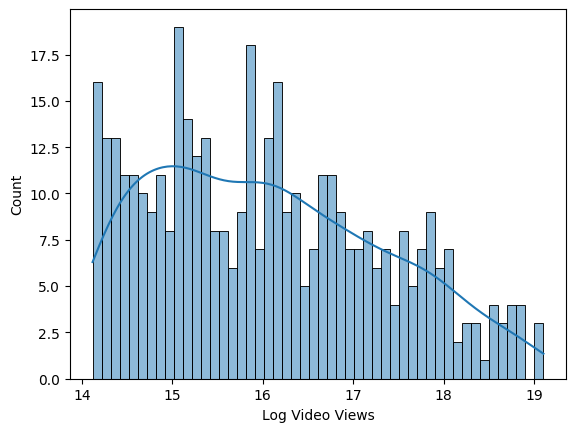

In [53]:
sns.histplot(org_df[org_df['Log Video Views Bucket'].isin(["Bucket 4", "Bucket 5"])]['Log Video Views'], bins=50, kde=True)

In [26]:
pred_df = pd.read_csv("prediction_data.csv")
pred_df.head()

,Log Total Channel Subcribers,Log Total Chanel Views,Log Duration in Seconds,Log Maximum Quality of the Video,Log No of Videos the Channel,Log No of Playlist,Loyalty Score,Atractness Score,Efficiency Score,Predicted_Label
0,12.26,17.33,5.73,6.17,4.38,1.95,1.37,1.41,3.96,1
1,10.15,16.88,5.55,5.48,5.73,3.04,1.66,1.66,2.95,1
2,17.80,23.91,5.56,6.98,5.50,2.30,1.19,1.34,4.35,1
3,12.60,16.89,6.37,6.58,5.95,3.33,1.16,1.34,2.84,0
4,12.60,16.89,6.37,6.58,5.95,3.81,1.00,1.34,2.84,0


In [32]:
common_cols = [
    'Log Total Channel Subcribers', 'Log Total Chanel Views',
    'Log Duration in Seconds', 'Log Maximum Quality of the Video',
    'Log No of Videos the Channel', 'Log No of Playlist', 'Loyalty Score',
    'Atractness Score', 'Efficiency Score'
]

# Merge işlemi
df_merged = org_df.merge(pred_df[common_cols + ['Predicted_Label']], 
                          on=common_cols, 
                          how='left')


df_cleaned = df_merged.dropna(subset=['Predicted_Label'])
df_cleaned.head()

,Creator Name,Video Views,Log Video Views,Log Video Views Bucket,Log Total Channel Subcribers,Log Total Chanel Views,Log Duration in Seconds,Log Maximum Quality of the Video,Log No of Videos the Channel,Log No of Playlist,Loyalty Score,Atractness Score,Efficiency Score,Predicted_Label
2,Jam05028,19897294,16.81,Bucket 5,12.26,17.33,5.73,6.17,4.38,1.95,1.37,1.41,3.96,1.00
5,100 Years Of Health,21274487,16.87,Bucket 5,10.15,16.88,5.55,5.48,5.73,3.04,1.66,1.66,2.95,1.00
6,Eminem,1696620790,21.25,Bucket 6,17.80,23.91,5.56,6.98,5.50,2.30,1.19,1.34,4.35,1.00
7,Chandoo,2317664,14.66,Bucket 4,12.60,16.89,6.37,6.58,5.95,3.33,1.16,1.34,2.84,0.00
8,Chandoo,36148,10.50,Bucket 2,12.60,16.89,6.37,6.58,5.95,3.81,1.00,1.34,2.84,0.00


In [35]:
df_cleaned.columns

Index(['Creator Name', 'Video Views', 'Log Video Views',
       'Log Video Views Bucket', 'Log Total Channel Subcribers',
       'Log Total Chanel Views', 'Log Duration in Seconds',
       'Log Maximum Quality of the Video', 'Log No of Videos the Channel',
       'Log No of Playlist', 'Loyalty Score', 'Atractness Score',
       'Efficiency Score', 'Predicted_Label'],
      dtype='object')

In [64]:
df_desired_bucket = df_cleaned[df_cleaned['Predicted_Label'] == 1].copy()
df_desired_bucket["Min Estimated Video Views"] = 1354030
df_desired_bucket["Max Estimated Video Views"] = 198286476
df_desired_bucket["Mean Estimated Video Views"] = 9317603 
df_desired_bucket["Median Estimated Video Views"] = 8060281
df_desired_bucket["Log Estimated Video Views"] = np.exp(df_desired_bucket["Log Video Views"])


df_desired_bucket[['Creator Name', 'Video Views', 'Log Video Views', "Log Estimated Video Views","Min Estimated Video Views","Max Estimated Video Views","Mean Estimated Video Views","Median Estimated Video Views"]]

,Creator Name,Video Views,Log Video Views,Log Estimated Video Views,Min Estimated Video Views,Max Estimated Video Views,Mean Estimated Video Views,Median Estimated Video Views
2,Jam05028,19897294,16.81,19897294.00,1354030,198286476,9317603,8060281
5,100 Years Of Health,21274487,16.87,21274487.00,1354030,198286476,9317603,8060281
6,Eminem,1696620790,21.25,1696620790.00,1354030,198286476,9317603,8060281
10,Nat Geo Wild,119278111,18.60,119278111.00,1354030,198286476,9317603,8060281
11,A P J Abdul Kalam,26964796,17.11,26964796.00,1354030,198286476,9317603,8060281
...,...,...,...,...,...,...,...,...
886,Marvel,20012287,16.81,20012287.00,1354030,198286476,9317603,8060281
891,Flying Beast,1213082,14.01,1213082.00,1354030,198286476,9317603,8060281
897,The Viral Fever,1426261,14.17,1426261.00,1354030,198286476,9317603,8060281
900,Marvel,519961,13.16,519961.00,1354030,198286476,9317603,8060281


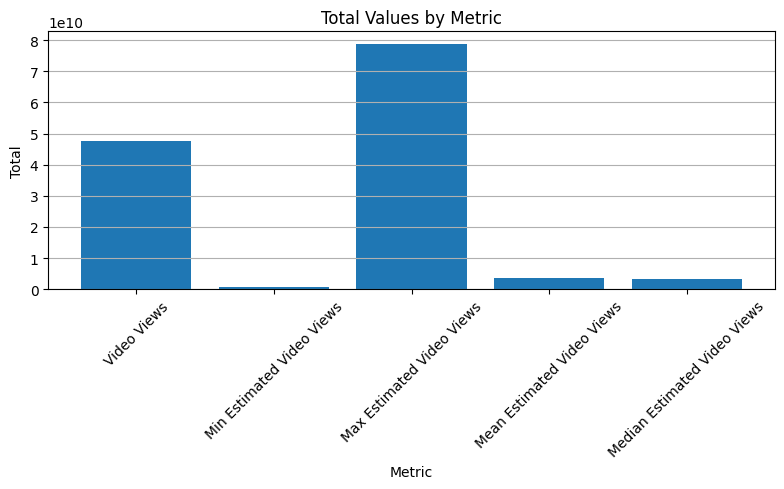

In [65]:
import matplotlib.pyplot as plt

# Toplamları hesapla
totals = df_desired_bucket[[
    "Video Views",
    "Min Estimated Video Views",
    "Max Estimated Video Views",
    "Mean Estimated Video Views",
    "Median Estimated Video Views"
]].agg(['sum']).T.reset_index()

totals.columns = ['Metric', 'Total']

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(totals['Metric'], totals['Total'])

plt.title('Total Values by Metric')
plt.xlabel('Metric')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Actual and predicted values
y_true = df_desired_bucket["Video Views"]
y_pred = df_desired_bucket["Mean Estimated Video Views"]

# MSE
mse = mean_squared_error(y_true, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_true, y_pred)

# R² Score
r2 = r2_score(y_true, y_pred)

# Display results
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


MSE: 367801986855611968.000
RMSE: 606466806.062
MAE: 115784004.809
R² Score: -0.034


In [72]:

# Actual and predicted values
y_true = df_desired_bucket["Video Views"]
y_pred = df_desired_bucket["Max Estimated Video Views"]

# MSE
mse = mean_squared_error(y_true, y_pred)

# RMSE
rmse = np.sqrt(mse)

# MAE
mae = mean_absolute_error(y_true, y_pred)

# R² Score
r2 = r2_score(y_true, y_pred)

# Display results
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


MSE: 361884479175594432.000
RMSE: 601568349.546
MAE: 252830353.739
R² Score: -0.017
